# Reconstruction Sandbox
This notebook is a test-bed for regularization and reconstruction methods

In [49]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

# Load motiondeblur module and Dataset class
import libwallerlab.projects.motiondeblur as md
# import htdeblur as md
from libwallerlab.utilities.io import Dataset, isDataset

# Platform imports
import os, glob
from os.path import expanduser

# Debugging imports
import llops as yp
import matplotlib.pyplot as plt
import numpy as np

yp.config.setDefaultBackend('numpy') #'arrayfire')
yp.config.setDefaultDatatype('float32')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Define Output Path

In [50]:
output_path = os.path.expanduser('~/deblurring/datasets/regularized_output')
if not os.path.exists(output_path):
    os.mkdir(output_path)

## Load Data

In [51]:
!ls /home/sarah/deblurring/datasets/beads_coded_raster_100/

background.tif
beads_raster_coded_raster_100_motion_deblur_2019_01_28_12_55_06.json
beads_raster_coded_raster_100_motion_deblur_2019_01_28_12_55_06.tif
calibration.json
dark_current.tif


In [52]:
!ls /home/sarah/Dropbox/02-04-19-MotionDeblur-beads2/beads2_line_45ms_coded_raster_100_motion_deblur_2019_02_04_16_45_36

background.tif
beads2_line_45ms_coded_raster_100_motion_deblur_2019_02_04_16_45_36.json
beads2_line_45ms_coded_raster_100_motion_deblur_2019_02_04_16_45_36.tif
calibration.json
dark_current.tif


In [53]:
dataset_full_path = '/home/sarah/deblurring/datasets/beads_coded_raster_100/'
dataset_full_path = '/home/sarah/Dropbox/02-04-19-MotionDeblur-beads2/beads2_line_45ms_coded_raster_100_motion_deblur_2019_02_04_16_45_36'
# Create dataset object (loads metadata)
dataset = Dataset(dataset_full_path, use_median_filter=False, subtract_mean_dark_current=False, force_type='motion_deblur')

Loading 1 frames...


## Perform Registration and Normalization

In [54]:
force = False

# Perform registration
dataset.motiondeblur.register(force=force)

# Perform normalization
dataset.motiondeblur.normalize(force=force)

# Perform kernel shape 
dataset.metadata.calibration['blur_vector'] = {'scale': {'axis': 1, 'factor': 1}}

## Solve For Single Segment

In [57]:
dataset.frame_mask = [10,11,12,13,14]

# Create recon object
recon = md.recon.Reconstruction(dataset, alpha_blend_distance=1000, normalize=False, use_psf=False, estimate_background_poly=True)

# Perform reconstruction
recon.reconstruct(iteration_count=30, step_size=0.5, frame_number=4, mode='global', reg_types={})

Minimizing function:


<IPython.core.display.Latex object>

|  Iter  |      Cost      | Elapsed time (s) |  Norm of Step  | Memory Usage (CPU/GPU) |
+ ------ + -------------- + ---------------- + -------------- + ---------------------- +


/home/sarah/deblurring/libwallerlab/submodules/llops/llops/fft.py:246: ComplexWarning: Casting complex values to real discards the imaginary part
  y[:] = sp.fftpack.ifftshift(sp.fftpack.ifft2(sp.fftpack.ifftshift(x, axes=axes), axes=axes), axes=axes)


|    0   |    2.07e+12    |       0.00       |    0.00e+00    | 8970.5 MB /    0.0 MB  |
|    3   |    2.25e+10    |      41.98       |    3.59e+05    | 9607.6 MB /    0.0 MB  |
|    6   |    7.93e+09    |      91.82       |    1.03e+03    | 9607.5 MB /    0.0 MB  |
|    9   |    7.03e+09    |     141.22       |    1.64e+03    | 9607.6 MB /    0.0 MB  |
|   12   |    6.08e+09    |     193.50       |    2.74e+03    | 9607.5 MB /    0.0 MB  |
|   15   |    5.18e+09    |     244.77       |    3.70e+03    | 9607.7 MB /    0.0 MB  |
|   18   |    4.38e+09    |     296.24       |    4.96e+03    | 9607.6 MB /    0.0 MB  |
|   21   |    3.67e+09    |     350.32       |    6.21e+03    | 9607.7 MB /    0.0 MB  |
|   24   |    3.05e+09    |     400.19       |    7.41e+03    | 9607.6 MB /    0.0 MB  |
|   27   |    2.53e+09    |     450.50       |    8.48e+03    | 9607.5 MB /    0.0 MB  |
|   30   |    2.12e+09    |     501.32       |    9.36e+03    | 9607.7 MB /    0.0 MB  |


<IPython.core.display.Javascript object>


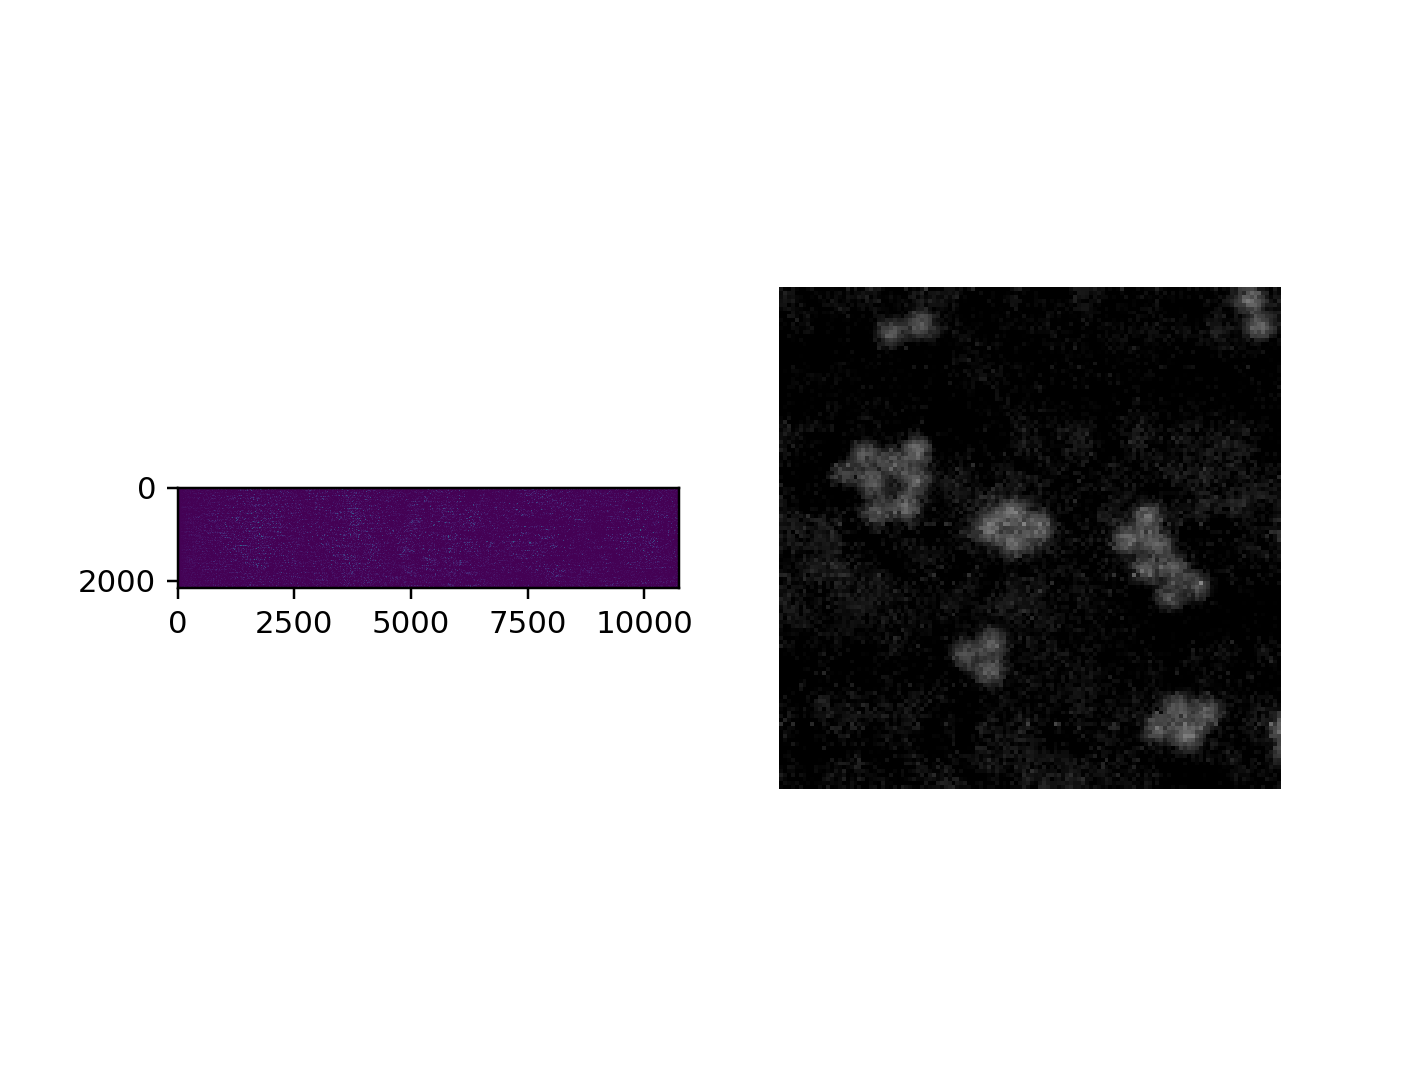

In [61]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(recon.object_recovered)
plt.clim(400, 4000)

plt.subplot(1,2,2)
beads_roi_crop_B = yp.Roi(start=(1178-32+10, 4049+10), shape=(128, 128))
plt.imshow(recon.object_recovered[beads_roi_crop_B.slice], cmap='gray')
plt.axis('off')
plt.clim(400,3000)

In [ ]:
recon.save(output_path, filename=recon.dataset.metadata.file_header + '_no_median', formats=['npz'], save_raw=False, downsample=4)

<IPython.core.display.Javascript object>


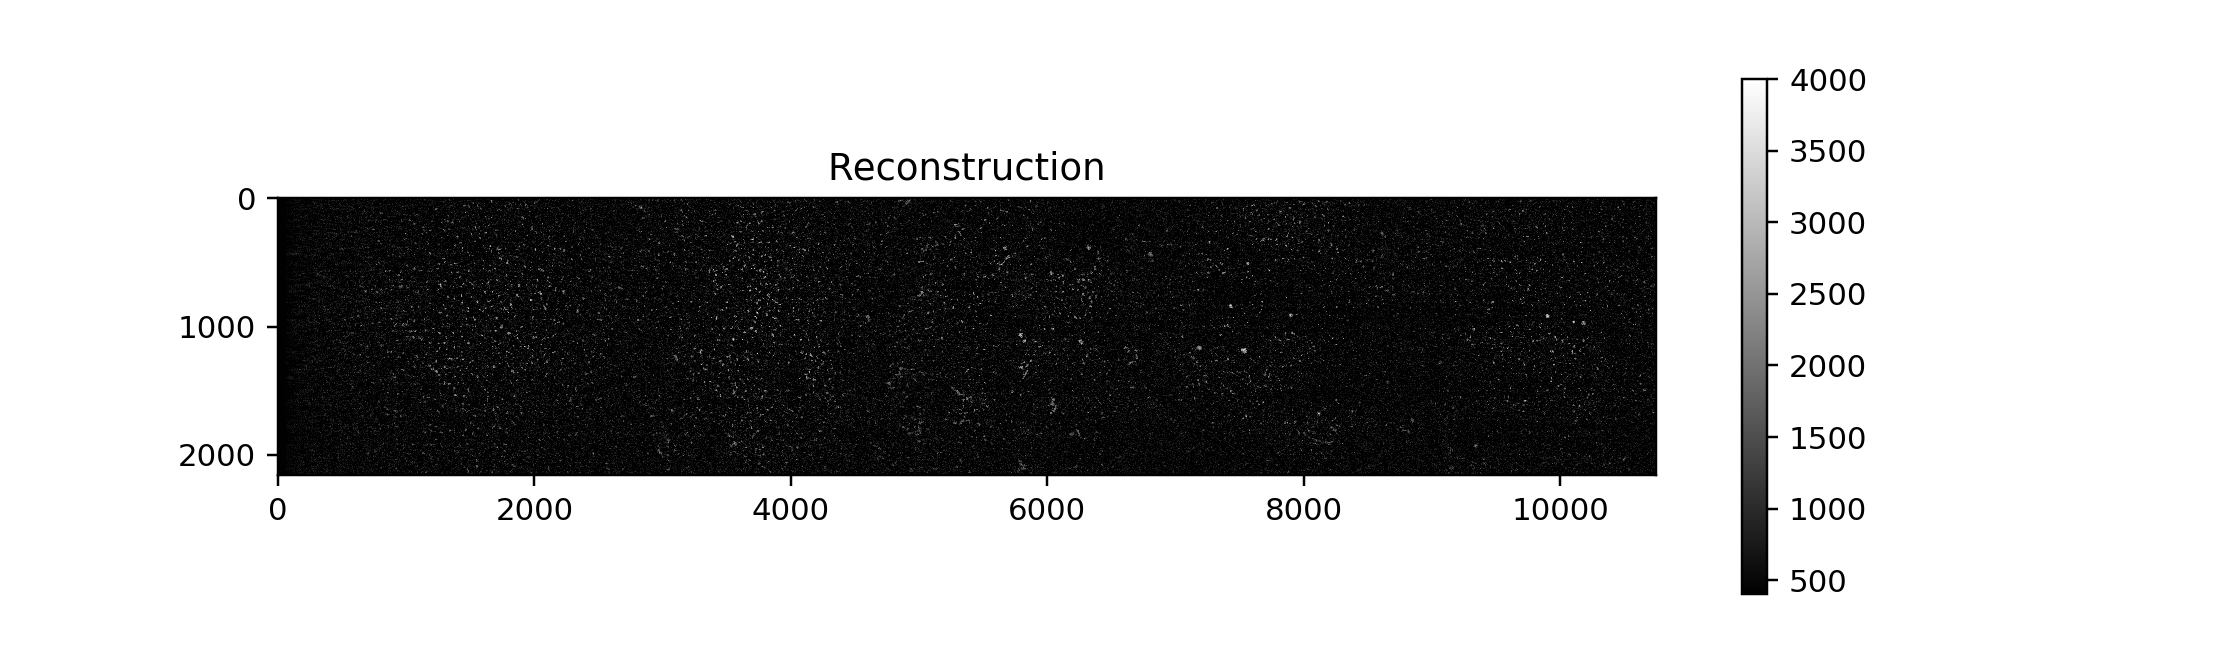

In [37]:
recon.show()
plt.clim(400,4000)



In [41]:
!ls /home/sarah/Dropbox/02-06-19-MotionDeblur/res_line_400_coded_raster_100_motion_deblur_2019_02_06_09_05_38


res_line_400_coded_raster_100_motion_deblur_2019_02_06_09_05_38


In [42]:
dataset_full_path = '/home/sarah/Dropbox/02-06-19-MotionDeblur/res_line_400_coded_raster_100_motion_deblur_2019_02_06_09_05_38'
# Create dataset object (loads metadata)
dataset = Dataset(dataset_full_path, use_median_filter=False, subtract_mean_dark_current=False, force_type='motion_deblur')#'res' not in dataset_label)
dataset.channel_mask = [0]

Loading 1 frames...


In [43]:
force = False

# Perform registration
dataset.motiondeblur.register(force=force)

# Perform normalization
dataset.motiondeblur.normalize(force=force)

# Perform kernel shape 
dataset.metadata.calibration['blur_vector'] = {'scale': {'axis': 1, 'factor': 1}}

Loading 9 frames...


Minimizing function:


<IPython.core.display.Latex object>

|  Iter  |      Cost      | Elapsed time (s) |  Norm of Step  | Memory Usage (CPU/GPU) |
+ ------ + -------------- + ---------------- + -------------- + ---------------------- +


/home/sarah/deblurring/libwallerlab/submodules/llops/llops/fft.py:246: ComplexWarning: Casting complex values to real discards the imaginary part
  y[:] = sp.fftpack.ifftshift(sp.fftpack.ifft2(sp.fftpack.ifftshift(x, axes=axes), axes=axes), axes=axes)


|    0   |    3.02e+13    |       0.00       |    0.00e+00    | 6422.7 MB /    0.0 MB  |
|   10   |    2.28e+10    |      93.53       |    4.06e+03    | 6820.9 MB /    0.0 MB  |
|   20   |    1.49e+10    |     189.97       |    9.60e+03    | 6821.3 MB /    0.0 MB  |
|   30   |    9.29e+09    |     283.57       |    1.65e+04    | 6821.0 MB /    0.0 MB  |
|   40   |    5.81e+09    |     377.07       |    2.10e+04    | 6821.4 MB /    0.0 MB  |
|   50   |    3.80e+09    |     477.04       |    2.18e+04    | 6821.5 MB /    0.0 MB  |
|   60   |    2.70e+09    |     575.01       |    2.01e+04    | 6821.2 MB /    0.0 MB  |
|   70   |    2.06e+09    |     668.90       |    1.71e+04    | 6821.3 MB /    0.0 MB  |
|   80   |    1.65e+09    |     766.38       |    1.37e+04    | 6821.2 MB /    0.0 MB  |
|   90   |    1.36e+09    |     860.64       |    1.06e+04    | 6821.4 MB /    0.0 MB  |
|  100   |    1.14e+09    |     956.63       |    8.19e+03    | 6821.3 MB /    0.0 MB  |


<IPython.core.display.Javascript object>


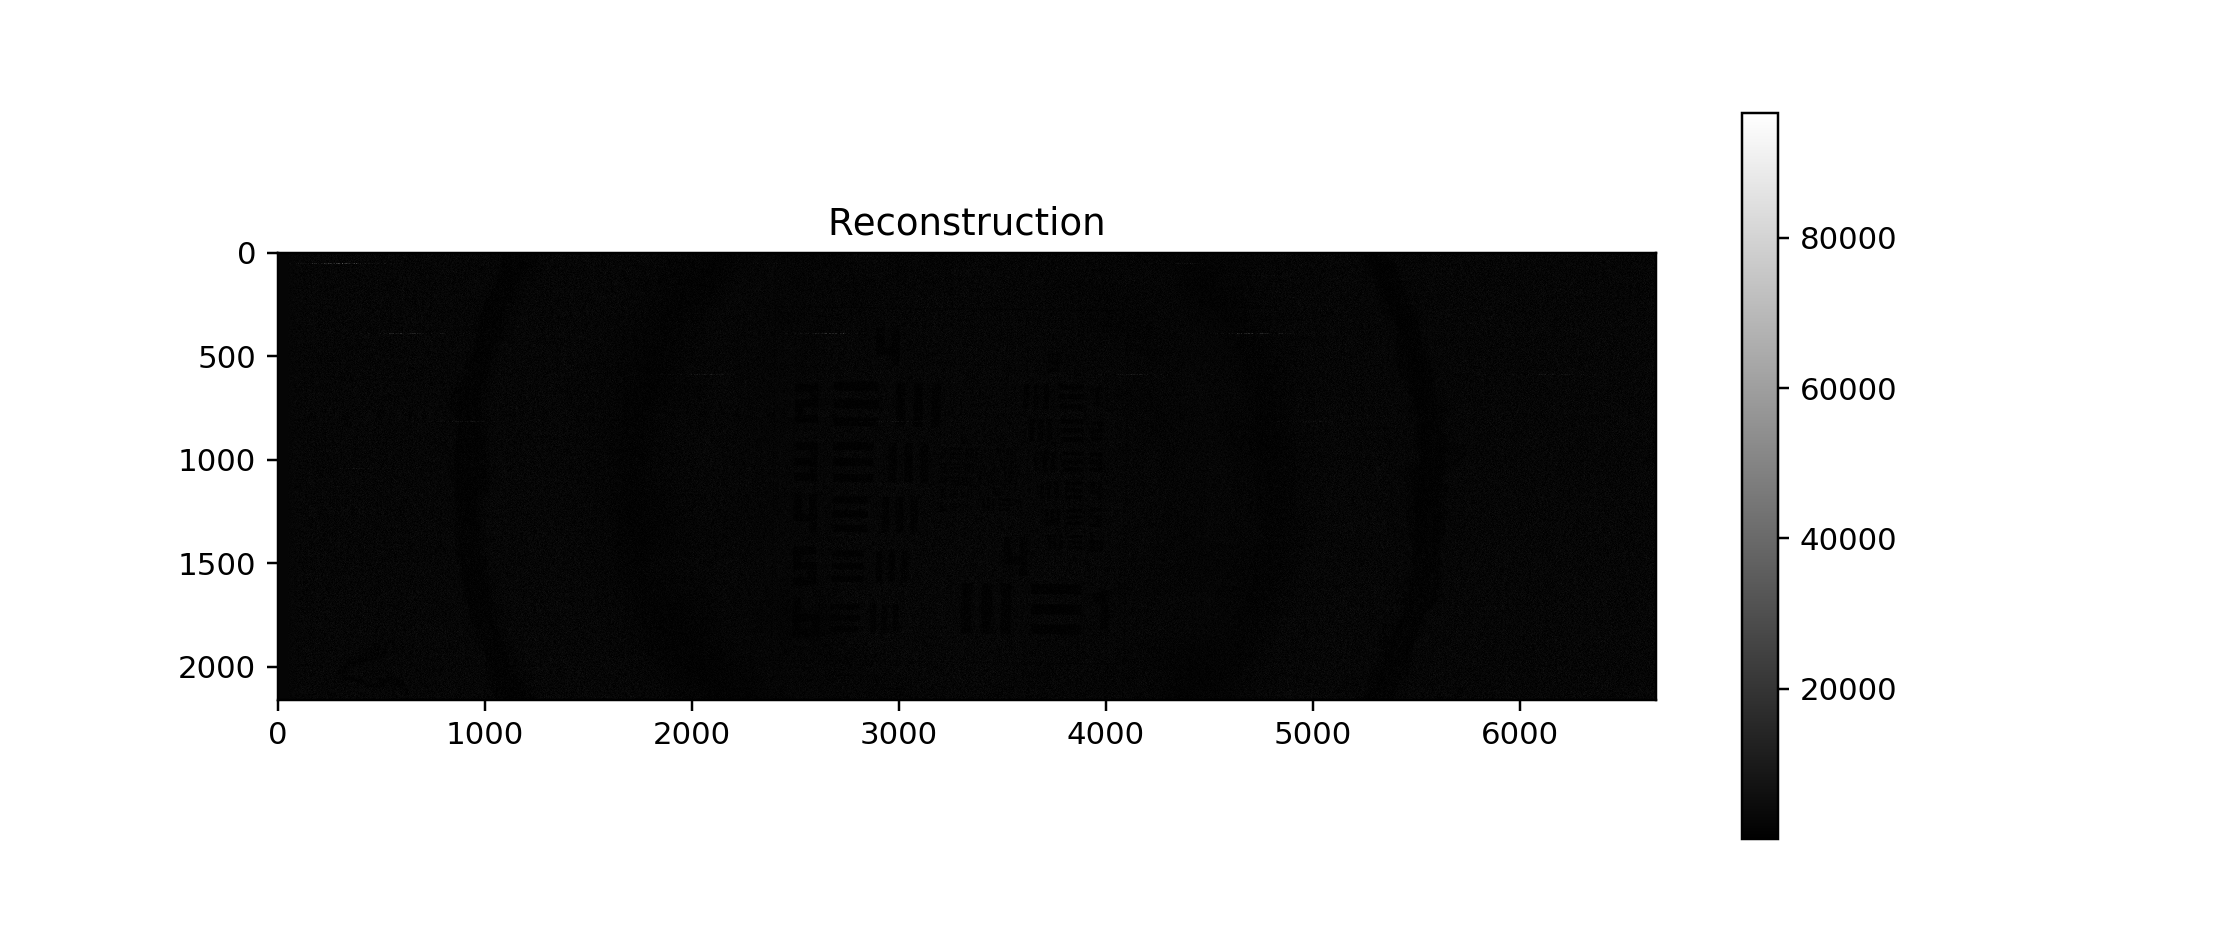

In [44]:
# dataset.motiondeblur.position_segment_indicies = [4]
dataset.frame_mask = [4,5,6]

# Create recon object
recon = md.recon.Reconstruction(dataset, alpha_blend_distance=1000, pad_mode='mean', estimate_background_poly=True)

# Perform reconstruction
recon.reconstruct(iteration_count=100, step_size=1, frame_number=4, mode='global', reg_types={})

# Save result
# recon.save(output_path, filename=recon.dataset.metadata.file_header + '_reprocess', formats=['png', 'npz'], save_raw=True, downsample=4)
recon.show()

<IPython.core.display.Javascript object>


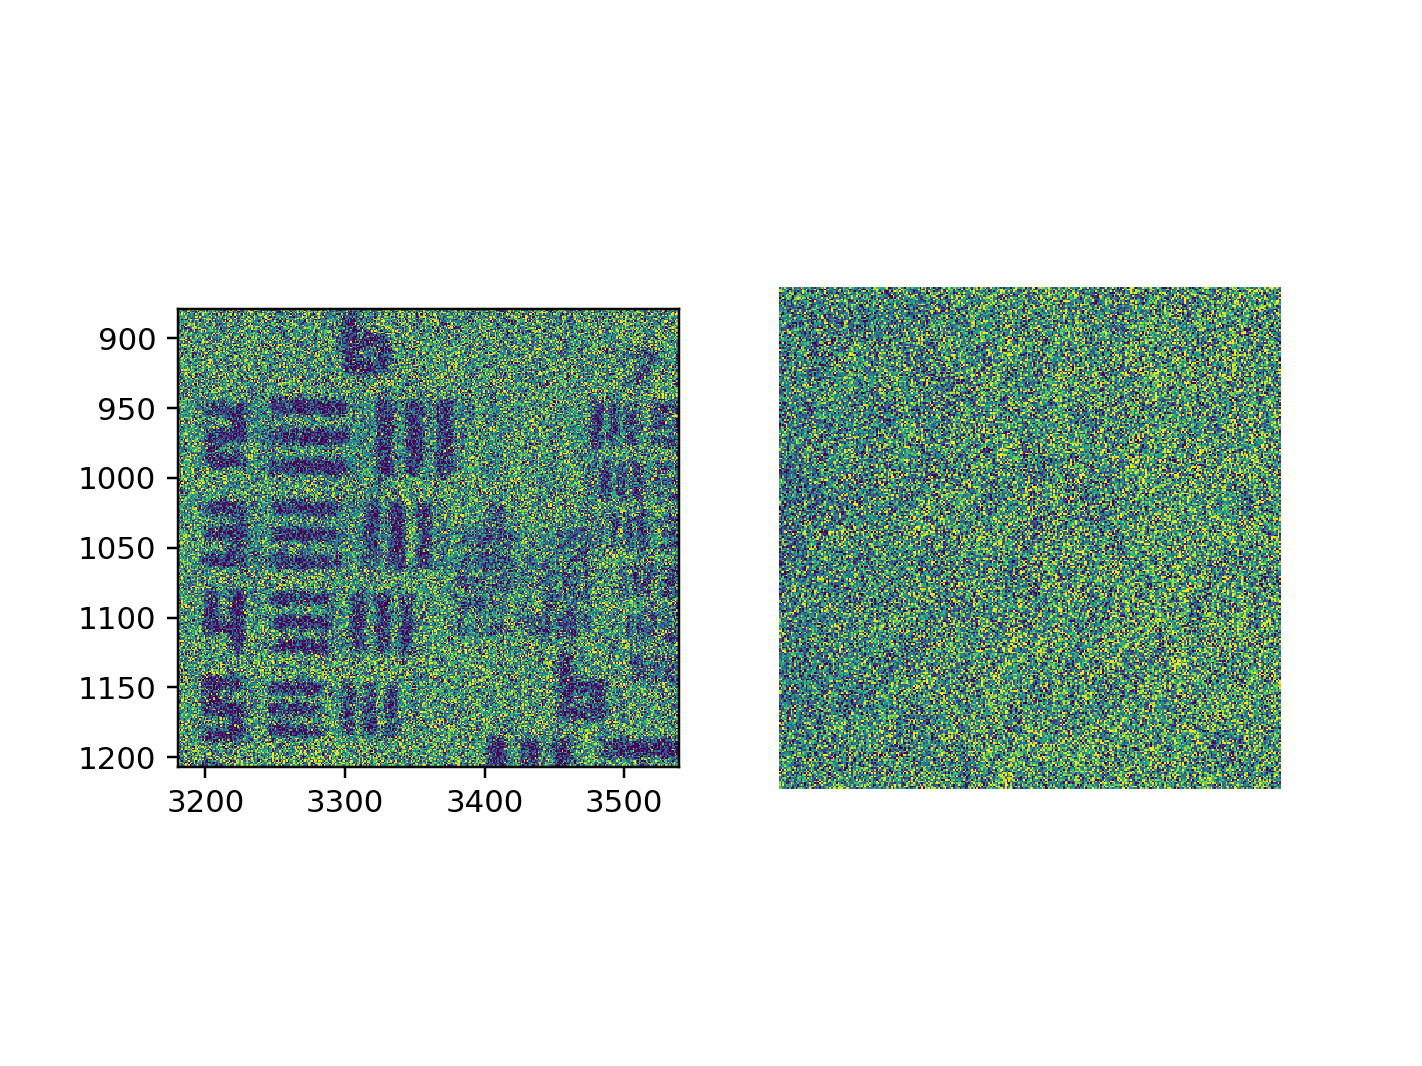

In [47]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(recon.object_recovered)
plt.clim(400, 4000)

plt.subplot(1,2,2)
res_roi_crop_B_1 = yp.Roi(start=(1000-75,4950-25), shape=(300,300))
plt.imshow(recon.object_recovered[res_roi_crop_B_1.slice])
plt.axis('off')
plt.clim(400,4000)

In [48]:
recon.save(output_path, filename=recon.dataset.metadata.file_header + '_reprocess', formats=['png', 'npz'], save_raw=True, downsample=4)

Saved .npz file to /home/sarah/deblurring/datasets/regularized_output/res_line_400_coded_raster_100_motion_deblur_2019_02_06_09_05_38_reprocess_regularize=[].npz


/home/sarah/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/sarah/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


Saved reconstruction .png file to /home/sarah/deblurring/datasets/regularized_output/res_line_400_coded_raster_100_motion_deblur_2019_02_06_09_05_38_reprocess_regularize=[].png
Saved measurement .png file to /home/sarah/deblurring/datasets/regularized_output/res_line_400_coded_raster_100_motion_deblur_2019_02_06_09_05_38_reprocess_regularize=[].png


## Calculate DNF

In [12]:
x = dataset.motiondeblur.blur_vectors()[0][0][0]

# Normalize
x = x / yp.scalar(yp.sum(x))

# Take fourier transform intensity
x_fft = yp.Ft(x)
sigma_x = yp.abs(x_fft) ** 2

# Calculate DNF
np.sqrt(1 / len(x) * np.sum(1 / sigma_x))

25.693665622580987

## Loop Over Segments

In [ ]:
for segment_index in dataset.motiondeblur.position_segment_indicies_full:
    # Set segment index
    dataset.motiondeblur.position_segment_indicies = [segment_index]
    
    # Create recon object
    recon = md.recon.Reconstruction(dataset, alpha_blend_distance=1000, pad_mode='mean', )

    # Perform reconstruction
#     recon.reconstruct(iteration_count=-1, step_size=1, frame_number=4, mode='global', reg_types={'l2': 1e-4})
    recon.reconstruct(iteration_count=100, step_size=1, frame_number=4, mode='global', reg_types={'l2': 1e-4})

    # Save result
    recon.save(output_path, filename=recon.dataset.metadata.file_header, formats=['png', 'npz'], save_raw=True, downsample=4)

In [ ]:
# Try with L1 Sparsity